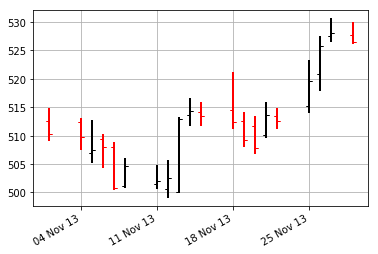

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import (MONDAY, DateFormatter, MonthLocator,
                              WeekdayLocator, date2num)

from mpl_finance import plot_day_summary_oclh

date1 = "2013-11-1"
date2 = "2013-12-1"

# every monday
mondays = WeekdayLocator(MONDAY)
daysFmt = DateFormatter("%d %b %y")


quotes = pd.read_csv('market_data/yahoofinance-GOOG-20040819-20180120.csv',
                     index_col=0,
                     parse_dates=True,
                     infer_datetime_format=True)

# select desired range of dates
quotes = quotes[(quotes.index >= date1) & (quotes.index <= date2)]


fig, ax = plt.subplots()
plot_day_summary_oclh(ax, zip(date2num(quotes.index.to_pydatetime()),
                              quotes['Open'], quotes['Close'],
                              quotes['Low'], quotes['High']),
                      ticksize=3)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(daysFmt)
ax.autoscale_view()
ax.xaxis.grid(True, 'major')
ax.grid(True)

fig.autofmt_xdate()

plt.show()